# Importing the Modules

In [ ]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import keras
from keras.preprocessing.image import ImageDataGenerator

# Mounting Drive and Data_set preparation

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
path_images = '/content/gdrive/MyDrive/Colab Notebooks/dryFruits'  #path from cloab

for images in os.listdir(os.path.join(path_images)):   #joining indv folders inside root folder
  print(images)

Pista
Walnut
Cashew
Dates
Raisin
Almond


In [ ]:

labels = ["Pista", "Walnut", "Cashew", "Dates", "Raisin", "Almond"]  #label name of indv folders (index as labels for each class)
dryfruit_data =[]
imagesize=256  #size 256*256
def data_preparation():
    
    for label in labels:
        path = os.path.join(path_images, label) # this is the path to dataset
        class_labels = labels.index(label)  #it will get index corresponding to class
        for images in os.listdir(path):
            try:
                images_array = cv2.imread(os.path.join(path, images), 0)
                #print(images_array.shape)
                # cv2.IMREAD_GRAYSCALE converts images to gray scale
                new_array = cv2.resize(images_array,(imagesize, imagesize))
                dryfruit_data.append([new_array, class_labels])
            except Exception as e:
                pass
            

data_preparation()
random.seed(666) 
random.shuffle(dryfruit_data)
features=[]
dryFruit_label = []
for i,j in dryfruit_data:
    features.append(i)
    dryFruit_label.append(j)

dryFruit_label = np.array(dryFruit_label)
print("Number of images in the dataset:",len(features))
print("Number of Labels in the dataset:",dryFruit_label.shape)            

Number of images in the dataset: 194
Number of Labels in the dataset: (194,)


5
(256, 256)


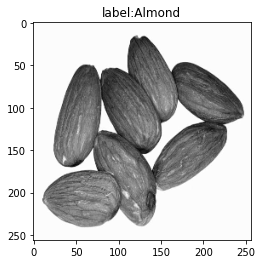

In [ ]:
idx = 11   # select any index out of 194 images, here 11 th image is displayed
a = np.array(features[idx])
a_label = dryFruit_label[idx]
print(a_label)
print(a.shape)  
plt.title(f'label:{labels[a_label]}') # in labels 0th idx is pista(title)...5th idx is raisin
plt.imshow(a, cmap='gray')
plt.show()

# AUGMENTATION

In [ ]:
Pista_idx = []
Walnut_idx = []
Cashew_idx =[]
Dates_idx = []
Raisin_idx = []
Almond_idx = []

for i in range(len(features)):
  if dryFruit_label[i] == 0:
    Pista_idx.append(i)
  if dryFruit_label[i] ==1:
    Walnut_idx.append(i)
  if dryFruit_label[i] == 2:
    Cashew_idx.append(i)
  if dryFruit_label[i] == 3:
    Dates_idx.append(i)
  if dryFruit_label[i] == 4:
    Raisin_idx.append(i)
  if dryFruit_label[i] == 5:
    Almond_idx.append(i)
     

In [ ]:
from skimage import transform as tf
from keras.utils import normalize

Finished Augmenting images for class Pista


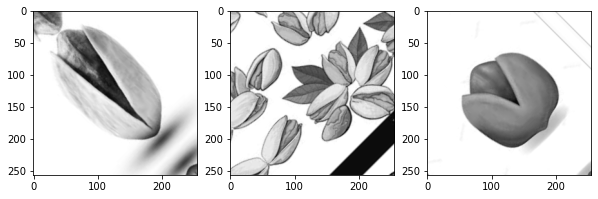

In [ ]:
i1 = Pista_idx
Pistadata_augment = []
for m in i1:
    dummy3 = tf.rotate(features[m], angle=45, mode='reflect')
    Pistadata_augment.append(dummy3)
    dummy3E = tf.rotate(features[m], angle=45, mode='edge')
    Pistadata_augment.append(dummy3E)
    dummy3S = tf.rotate(features[m], angle=45, mode='symmetric')
    Pistadata_augment.append(dummy3S)
    
    dummy135 = tf.rotate(features[m], angle=135, mode='reflect')
    Pistadata_augment.append(dummy135)
    dummy135E = tf.rotate(features[m], angle=135, mode='edge')
    Pistadata_augment.append(dummy135E)
    dummy135S = tf.rotate(features[m], angle=135, mode='symmetric')
    Pistadata_augment.append(dummy135S)
    
    
    dummy60 = tf.rotate(features[m], angle=60, mode='reflect')
    Pistadata_augment.append(dummy60)
    dummy60E = tf.rotate(features[m], angle=60, mode='edge')
    Pistadata_augment.append(dummy60E)
    dummy60S = tf.rotate(features[m], angle=60, mode='symmetric')
    Pistadata_augment.append(dummy60S)
       
    dummyflip = normalize(np.fliplr(features[m]), axis=1)
    Pistadata_augment.append(dummyflip )


plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
plt.imshow(Pistadata_augment[0], cmap='gray')
plt.subplot(1,3,2)
plt.imshow(Pistadata_augment[10], cmap='gray')
plt.subplot(1,3,3)
plt.imshow(Pistadata_augment[20], cmap='gray')

Pistadata_CNN = np.array(Pistadata_augment).reshape(-1, imagesize, imagesize,1)
Pistadata = np.array(Pistadata_augment).reshape(-1, imagesize, imagesize)
Pistadata_new = Pistadata.reshape((len(Pistadata), 256*256)) # 30*30
Pistadata_df = pd.DataFrame(Pistadata_new)
label = np.repeat(0, len(Pistadata)) # 0=> pista, walnut replace => idx =1
Pistadata_df['label'] = label
print('Finished Augmenting images for class Pista')

Finished Augmenting images for class Walnut


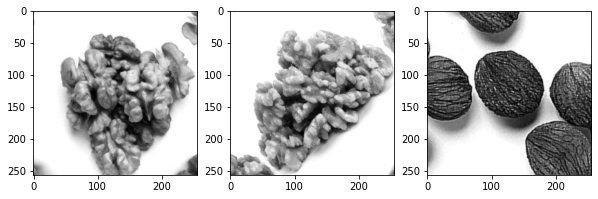

In [ ]:
i2 = Walnut_idx
Walnutdata_augment = []
for m1 in i2:
    dummy3 = tf.rotate(features[m1], angle=45, mode='reflect')
    Walnutdata_augment.append(dummy3)
    dummy3E = tf.rotate(features[m1], angle=45, mode='edge')
    Walnutdata_augment.append(dummy3E)
    dummy3S = tf.rotate(features[m1], angle=45, mode='symmetric')
    Walnutdata_augment.append(dummy3S)
    
    dummy135 = tf.rotate(features[m1], angle=135, mode='reflect')
    Walnutdata_augment.append(dummy135)
    dummy135E = tf.rotate(features[m1], angle=135, mode='edge')
    Walnutdata_augment.append(dummy135E)
    dummy135S = tf.rotate(features[m1], angle=135, mode='symmetric')
    Walnutdata_augment.append(dummy135S)
    
    
    dummy60 = tf.rotate(features[m1], angle=60, mode='reflect')
    Walnutdata_augment.append(dummy60)
    dummy60E = tf.rotate(features[m1], angle=60, mode='edge')
    Walnutdata_augment.append(dummy60E)
    dummy60S = tf.rotate(features[m1], angle=60, mode='symmetric')
    Walnutdata_augment.append(dummy60S)
       
    dummyflip = normalize(np.fliplr(features[m1]), axis=1)
    Walnutdata_augment.append(dummyflip )


plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
plt.imshow(Walnutdata_augment[0], cmap='gray')
plt.subplot(1,3,2)
plt.imshow(Walnutdata_augment[10], cmap='gray')
plt.subplot(1,3,3)
plt.imshow(Walnutdata_augment[20], cmap='gray')

Walnutdata_CNN = np.array(Walnutdata_augment).reshape(-1, imagesize, imagesize,1)
Walnutdata = np.array(Walnutdata_augment).reshape(-1, imagesize, imagesize)
Walnutdata_new = Walnutdata.reshape((len(Walnutdata), 256*256)) # 30*30
Walnutdata_df = pd.DataFrame(Walnutdata_new)
label = np.repeat(1, len(Walnutdata)) # 1 => walnut 
Walnutdata_df['label'] = label
print('Finished Augmenting images for class Walnut')


Finished Augmenting images for class Cashew


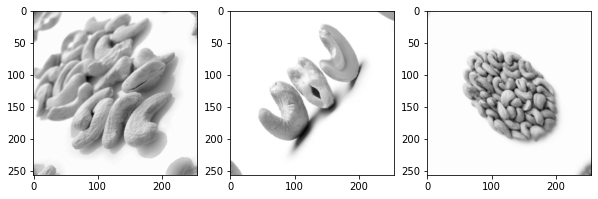

In [ ]:
i3 = Cashew_idx
Cashewdata_augment = []
for m2 in i3:
    dummy3 = tf.rotate(features[m2], angle=45, mode='reflect')
    Cashewdata_augment.append(dummy3)
    dummy3E = tf.rotate(features[m2], angle=45, mode='edge')
    Cashewdata_augment.append(dummy3E)
    dummy3S = tf.rotate(features[m2], angle=45, mode='symmetric')
    Cashewdata_augment.append(dummy3S)
    
    dummy135 = tf.rotate(features[m2], angle=135, mode='reflect')
    Cashewdata_augment.append(dummy135)
    dummy135E = tf.rotate(features[m2], angle=135, mode='edge')
    Cashewdata_augment.append(dummy135E)
    dummy135S = tf.rotate(features[m2], angle=135, mode='symmetric')
    Cashewdata_augment.append(dummy135S)
    
    
    dummy60 = tf.rotate(features[m2], angle=60, mode='reflect')
    Cashewdata_augment.append(dummy60)
    dummy60E = tf.rotate(features[m2], angle=60, mode='edge')
    Cashewdata_augment.append(dummy60E)
    dummy60S = tf.rotate(features[m2], angle=60, mode='symmetric')
    Cashewdata_augment.append(dummy60S)
       
    dummyflip = normalize(np.fliplr(features[m2]), axis=1)
    Cashewdata_augment.append(dummyflip )


plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
plt.imshow(Cashewdata_augment[0], cmap='gray')
plt.subplot(1,3,2)
plt.imshow(Cashewdata_augment[10], cmap='gray')
plt.subplot(1,3,3)
plt.imshow(Cashewdata_augment[20], cmap='gray')

Cashewdata_CNN = np.array(Cashewdata_augment).reshape(-1, imagesize, imagesize,1)
Cashewdata = np.array(Cashewdata_augment).reshape(-1, imagesize, imagesize)
Cashewdata_new = Cashewdata.reshape((len(Cashewdata), 256*256)) 
Cashewdata_df = pd.DataFrame(Cashewdata_new)
label = np.repeat(2, len(Cashewdata)) # 2 => Cashew 
Cashewdata_df['label'] = label
print('Finished Augmenting images for class Cashew')

Finished Augmenting images for class Dates


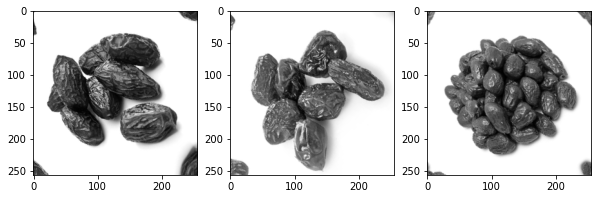

In [ ]:
i4 = Dates_idx
Datesdata_augment = []
for m3 in i4:
    dummy3 = tf.rotate(features[m3], angle=45, mode='reflect')
    Datesdata_augment.append(dummy3)
    dummy3E = tf.rotate(features[m3], angle=45, mode='edge')
    Datesdata_augment.append(dummy3E)
    dummy3S = tf.rotate(features[m3], angle=45, mode='symmetric')
    Datesdata_augment.append(dummy3S)
    
    dummy135 = tf.rotate(features[m3], angle=135, mode='reflect')
    Datesdata_augment.append(dummy135)
    dummy135E = tf.rotate(features[m3], angle=135, mode='edge')
    Datesdata_augment.append(dummy135E)
    dummy135S = tf.rotate(features[m3], angle=135, mode='symmetric')
    Datesdata_augment.append(dummy135S)
    
    
    dummy60 = tf.rotate(features[m3], angle=60, mode='reflect')
    Datesdata_augment.append(dummy60)
    dummy60E = tf.rotate(features[m3], angle=60, mode='edge')
    Datesdata_augment.append(dummy60E)
    dummy60S = tf.rotate(features[m3], angle=60, mode='symmetric')
    Datesdata_augment.append(dummy60S)
       
    dummyflip = normalize(np.fliplr(features[m3]), axis=1)
    Datesdata_augment.append(dummyflip )


plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
plt.imshow(Datesdata_augment[0], cmap='gray')
plt.subplot(1,3,2)
plt.imshow(Datesdata_augment[10], cmap='gray')
plt.subplot(1,3,3)
plt.imshow(Datesdata_augment[20], cmap='gray')

Datesdata_CNN = np.array(Datesdata_augment).reshape(-1, imagesize, imagesize,1)
Datesdata = np.array(Datesdata_augment).reshape(-1, imagesize, imagesize)
Datesdata_new = Datesdata.reshape((len(Datesdata), 256*256)) # 100*100
Datesdata_df = pd.DataFrame(Datesdata_new)
label = np.repeat(3, len(Datesdata)) 
Datesdata_df['label'] = label
print('Finished Augmenting images for class Dates')

Finished Augmenting images for class Raisin


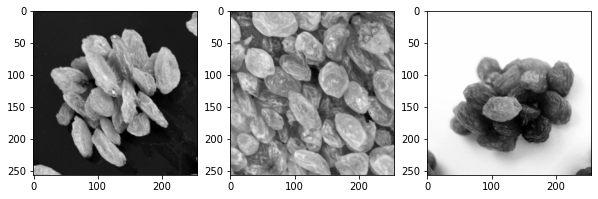

In [ ]:
i5 = Raisin_idx
Raisindata_augment = []
for m4 in i5:
    dummy3 = tf.rotate(features[m4], angle=45, mode='reflect')
    Raisindata_augment.append(dummy3)
    dummy3E = tf.rotate(features[m4], angle=45, mode='edge')
    Raisindata_augment.append(dummy3E)
    dummy3S = tf.rotate(features[m4], angle=45, mode='symmetric')
    Raisindata_augment.append(dummy3S)
    
    dummy135 = tf.rotate(features[m4], angle=135, mode='reflect')
    Raisindata_augment.append(dummy135)
    dummy135E = tf.rotate(features[m4], angle=135, mode='edge')
    Raisindata_augment.append(dummy135E)
    dummy135S = tf.rotate(features[m4], angle=135, mode='symmetric')
    Raisindata_augment.append(dummy135S)
    
    
    dummy60 = tf.rotate(features[m4], angle=60, mode='reflect')
    Raisindata_augment.append(dummy60)
    dummy60E = tf.rotate(features[m4], angle=60, mode='edge')
    Raisindata_augment.append(dummy60E)
    dummy60S = tf.rotate(features[m4], angle=60, mode='symmetric')
    Raisindata_augment.append(dummy60S)
       
    dummyflip = normalize(np.fliplr(features[m4]), axis=1)
    Raisindata_augment.append(dummyflip )


plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
plt.imshow(Raisindata_augment[0], cmap='gray')
plt.subplot(1,3,2)
plt.imshow(Raisindata_augment[10], cmap='gray')
plt.subplot(1,3,3)
plt.imshow(Raisindata_augment[20], cmap='gray')

Raisindata_CNN = np.array(Raisindata_augment).reshape(-1, imagesize, imagesize,1)
Raisindata = np.array(Raisindata_augment).reshape(-1, imagesize, imagesize)
Raisindata_new = Raisindata.reshape((len(Raisindata), 256*256)) # 100*100
Raisindata_df = pd.DataFrame(Raisindata_new)
label = np.repeat(4, len(Raisindata)) 
Raisindata_df['label'] = label
print('Finished Augmenting images for class Raisin')

Finished Augmenting images for class Almond


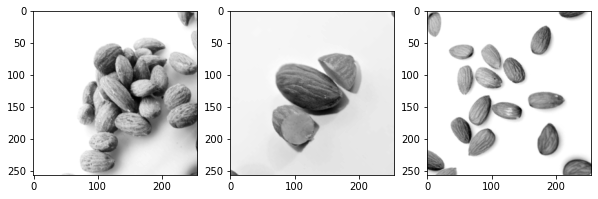

In [ ]:
i6 = Almond_idx
Almonddata_augment = []
for m4 in i6:
    dummy3 = tf.rotate(features[m4], angle=45, mode='reflect')
    Almonddata_augment.append(dummy3)
    dummy3E = tf.rotate(features[m4], angle=45, mode='edge')
    Almonddata_augment.append(dummy3E)
    dummy3S = tf.rotate(features[m4], angle=45, mode='symmetric')
    Almonddata_augment.append(dummy3S)
    
    dummy135 = tf.rotate(features[m4], angle=135, mode='reflect')
    Almonddata_augment.append(dummy135)
    dummy135E = tf.rotate(features[m4], angle=135, mode='edge')
    Almonddata_augment.append(dummy135E)
    dummy135S = tf.rotate(features[m4], angle=135, mode='symmetric')
    Almonddata_augment.append(dummy135S)
    
    
    dummy60 = tf.rotate(features[m4], angle=60, mode='reflect')
    Almonddata_augment.append(dummy60)
    dummy60E = tf.rotate(features[m4], angle=60, mode='edge')
    Almonddata_augment.append(dummy60E)
    dummy60S = tf.rotate(features[m4], angle=60, mode='symmetric')
    Almonddata_augment.append(dummy60S)
       
    dummyflip = normalize(np.fliplr(features[m4]), axis=1)
    Almonddata_augment.append(dummyflip )


plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
plt.imshow(Almonddata_augment[0], cmap='gray')
plt.subplot(1,3,2)
plt.imshow(Almonddata_augment[10], cmap='gray')
plt.subplot(1,3,3)
plt.imshow(Almonddata_augment[20], cmap='gray')

Almonddata_CNN = np.array(Almonddata_augment).reshape(-1, imagesize, imagesize, 1) # for CNN 1=> grayscale, 3=>color img
Almonddata = np.array(Almonddata_augment).reshape(-1, imagesize, imagesize)
Almonddata_new = Almonddata.reshape((len(Almonddata), 256*256)) # converting into 1D
Almonddata_df = pd.DataFrame(Almonddata_new) #making a DataFrame
label = np.repeat(5, len(Almonddata)) #creating a col called label in Almond_DataFrame
Almonddata_df['label'] = label
print('Finished Augmenting images for class Almond')

# Pre-Processing

In [ ]:
from sklearn.utils import shuffle
# combining all the dryFruits data into one data_set and concating it (data_aug)
originaldata = normalize(np.array(features)).reshape(-1, imagesize, imagesize) # converting into 1d
n_data = originaldata.reshape((len(originaldata), 256*256)) # converting original_data which was 30*30 to 1D
nddata_df = pd.DataFrame(n_data) 
nddata_df['label'] = dryFruit_label
dryFruit_df = pd.concat([nddata_df, Pistadata_df, Walnutdata_df, Cashewdata_df, Datesdata_df, Raisindata_df, Almonddata_df],ignore_index=True)
# combining my original data_set(n_data) and augmented dataset together as one DataFrame
dryFruit_df = shuffle(dryFruit_df) #shuffling the Dataset (shuffles all the index/labels)

dryFruit_label = dryFruit_df.label #last col is label
data = dryFruit_df.loc[:, dryFruit_df.columns != 'label'] #selecting all columns except last which is my labels
data = np.array(data)
dryFruit_label = np.array(dryFruit_label)
print("The size of the dataset:", data.shape)
print("The size of the labels:",  dryFruit_label.shape)

The size of the dataset: (2134, 65536)
The size of the labels: (2134,)


In [ ]:
dryFruit_label.shape

(2134,)

In [ ]:
originaldata.shape

(194, 256, 256)

In [ ]:
from collections import Counter
Counter(dryFruit_label)

Counter({0: 396, 1: 418, 2: 330, 3: 330, 4: 330, 5: 330})

Text(0.5, 1.0, 'Histogram of Different Classes After Data Augmentation')

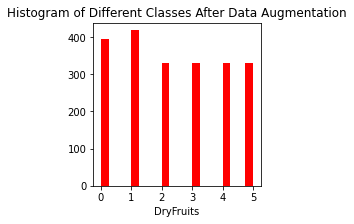

In [ ]:
plt.figure(figsize=(3, 3))
plt.hist(dryFruit_label, color='red', bins = 20)
plt.xticks(np.unique(dryFruit_label))
plt.xlabel('DryFruits')
plt.title('Histogram of Different Classes After Data Augmentation')

# TEST_TRAIN_SPLIT

In [ ]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_label, test_label = train_test_split(data, dryFruit_label, test_size = 0.75, random_state=0)
train_data,val_data,train_label,val_label = train_test_split(train_data, train_label, test_size = 0.75, random_state=0) #test_size is validation data

print("The size of the Train dataset:", train_data.shape)
print("The size of the Train Label:", train_label.shape)
print("The size of the Validation dataset:", val_data.shape)
print("The size of the Validation Label:", val_label.shape)
print("The size of the Test dataset:", test_data.shape)
print("The size of the Test Label:", test_label.shape)

The size of the Train dataset: (133, 65536)
The size of the Train Label: (133,)
The size of the Validation dataset: (400, 65536)
The size of the Validation Label: (400,)
The size of the Test dataset: (1601, 65536)
The size of the Test Label: (1601,)


# Decision Tree with PCA

In [ ]:
 from sklearn.decomposition import PCA

 pca = PCA(.95) 
 pca.fit(data)
 print(pca.components_)
 print(pca.explained_variance_)
 plt.figure(figsize=(10, 10))
 plt.plot(np.cumsum(pca.explained_variance_ratio_))
 plt.xlabel('number of components')
 plt.ylabel('cumulative explained variance')
 plt.title('Scree Plot', fontsize=20)
 print('Number of  Principal components choosen:', pca.n_components_)

 plt.plot()

#PCA is dim reduction tecnique which reduces number of dim and increares computational speed
#here 194 dim is reduced to 131

In [ ]:
pca_train = pca.transform(train_data)
pca_val = pca.transform(val_data)
pca_test = pca.transform(test_data)
print("The size of the PCA_train dataset:", pca_train.shape)
print("The size of the PCA_validation dataset:", pca_val.shape)
print("The size of the PCA_test dataset:", pca_test.shape)

In [ ]:
# Fitting the Decision Tree to Training set

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


classifier = DecisionTreeClassifier(criterion = "gini", splitter = 'best', random_state = 0)
classifier.fit(train_data, train_label);
tree.plot_tree(classifier);

import sklearn
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
cmatrix = confusion_matrix(test_label, Dtree_pred )
cmatrix

sklearn.metrics.accuracy_score(test_label, Dtree_pred)*100

# SVM

In [ ]:
from sklearn.svm import SVC

c=[1,10,20,30,40,50,60,70,80,90,100] #hyper parameters of algorithm, which hyper gives which accuracy we test it 
train_acc=[]
val_acc=[]
test_acc=[]
for i in c:
    print('The value of C:',i)
    svm_linear_kernel = SVC(C=i, kernel='rbf', class_weight = None, random_state = 0)
    svm_linear_kernel.fit(train_data, train_label)

    pred_values = svm_linear_kernel.predict(train_data) #gives train accuracy
    print('\n Training set Accuracy for Linear Kernel:' + str(100 * np.mean((pred_values == train_label).astype(float))) + '%') #gives accuracy as float value
    train_acc.append((100 * np.mean((pred_values == train_label).astype(float))))
    
    
    pred_values = svm_linear_kernel.predict(val_data)
    print('\n Validation set Accuracy for Linear Kernel:' + str(100 * np.mean((pred_values == val_label).astype(float))) + '%')
    val_acc.append((100 * np.mean((pred_values == val_label).astype(float))))

    pred_values = svm_linear_kernel.predict(test_data)
    print('\n Test set Accuracy for Linear Kernel:' + str(100 * np.mean((pred_values == test_label).astype(float))) + '%')
    test_acc.append((100 * np.mean((pred_values == test_label).astype(float))))

In [ ]:
Accuraries_DF = pd.DataFrame(train_acc)
Accuraries_DF['val_acc'] = val_acc
Accuraries_DF['test_acc'] = test_acc
Accuraries_DF['c'] = c
Accuraries_DF.columns = ['train_acc','val_acc','test_acc','c']
print(Accuraries_DF)

In [ ]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import sklearn
cm = confusion_matrix(test_label, pred_values)
cm

# CNN

In [ ]:
CNN_data = np.array(data).reshape(-1,imagesize,imagesize,1)
print('The size of the data for CNN:', CNN_data.shape)
print('The size of the corresponding label for CNN:', dryFruit_label.shape)

The size of the data for CNN: (2134, 256, 256, 1)
The size of the corresponding label for CNN: (2134,)


In [ ]:
traindata_CNN, testdata_CNN, trainlabel_CNN, testlabel_CNN = train_test_split(CNN_data, dryFruit_label, test_size = 0.2, random_state=0)
traindata_CNN,valdata_CNN,trainlabel_CNN,vallabel_CNN = train_test_split(traindata_CNN, trainlabel_CNN, test_size = 0.2, random_state=0)

print('Shape of train data for CNN:'+ str(traindata_CNN.shape))
print('Shape of train label data for CNN:'+ str(trainlabel_CNN.shape))

print('Shape of Validation data for CNN:'+ str(valdata_CNN.shape))
print('Shape of validation label data for CNN:'+ str(vallabel_CNN.shape))

print('Shape of Test data for CNN:'+ str(testdata_CNN.shape))
print('Shape of Test label data for CNN:'+ str(testlabel_CNN.shape))

Shape of train data for CNN:(1365, 256, 256, 1)
Shape of train label data for CNN:(1365,)
Shape of Validation data for CNN:(342, 256, 256, 1)
Shape of validation label data for CNN:(342,)
Shape of Test data for CNN:(427, 256, 256, 1)
Shape of Test label data for CNN:(427,)


In [ ]:
# to print labels for confusion matrix
#conf_test_label = testlabel_CNN

In [ ]:
from keras.utils import to_categorical
trainlabel_CNN = to_categorical(trainlabel_CNN)
testlabel_CNN = to_categorical(testlabel_CNN)
vallabel_CNN = to_categorical(vallabel_CNN)

In [ ]:
#testlabel_CNN

In [ ]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers import Dense
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Activation
from keras.layers import LeakyReLU
from keras.layers import Dropout
from keras.utils import plot_model
from keras.optimizers import Adam

In [ ]:
Cnn_network = Sequential()
Cnn_network.add(Conv2D(8, kernel_size=(3,3), input_shape= (256,256,1), padding='same'))
Cnn_network.add(LeakyReLU(alpha=0.15))
Cnn_network.add(MaxPooling2D((2,2),padding='same'))
Cnn_network.add(Dropout(0.30))
Cnn_network.add(Conv2D(16, kernel_size=(3,3), padding='same'))
Cnn_network.add(LeakyReLU(alpha=0.15))
Cnn_network.add(MaxPooling2D((2,2), padding='same'))
Cnn_network.add(Dropout(0.30))
Cnn_network.add(Conv2D(32, kernel_size=(3,3), padding='same'))
Cnn_network.add(LeakyReLU(alpha=0.15))
Cnn_network.add(MaxPooling2D((2,2), padding='same'))
Cnn_network.add(Dropout(0.30))
Cnn_network.add(Flatten())
Cnn_network.add(Dense(64))
Cnn_network.add(LeakyReLU(alpha=0.15))
Cnn_network.add(Dropout(0.6))
Cnn_network.add(Dense(6, activation='softmax'))

In [ ]:
opt = Adam(learning_rate=0.001)
Cnn_network.compile(loss="categorical_crossentropy", optimizer = opt, metrics=['accuracy'])

In [ ]:
Cnn_network.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 8)       80        
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 256, 256, 8)       0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 8)       0         
_________________________________________________________________
dropout (Dropout)            (None, 128, 128, 8)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 16)      1168      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 128, 128, 16)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 16)        0

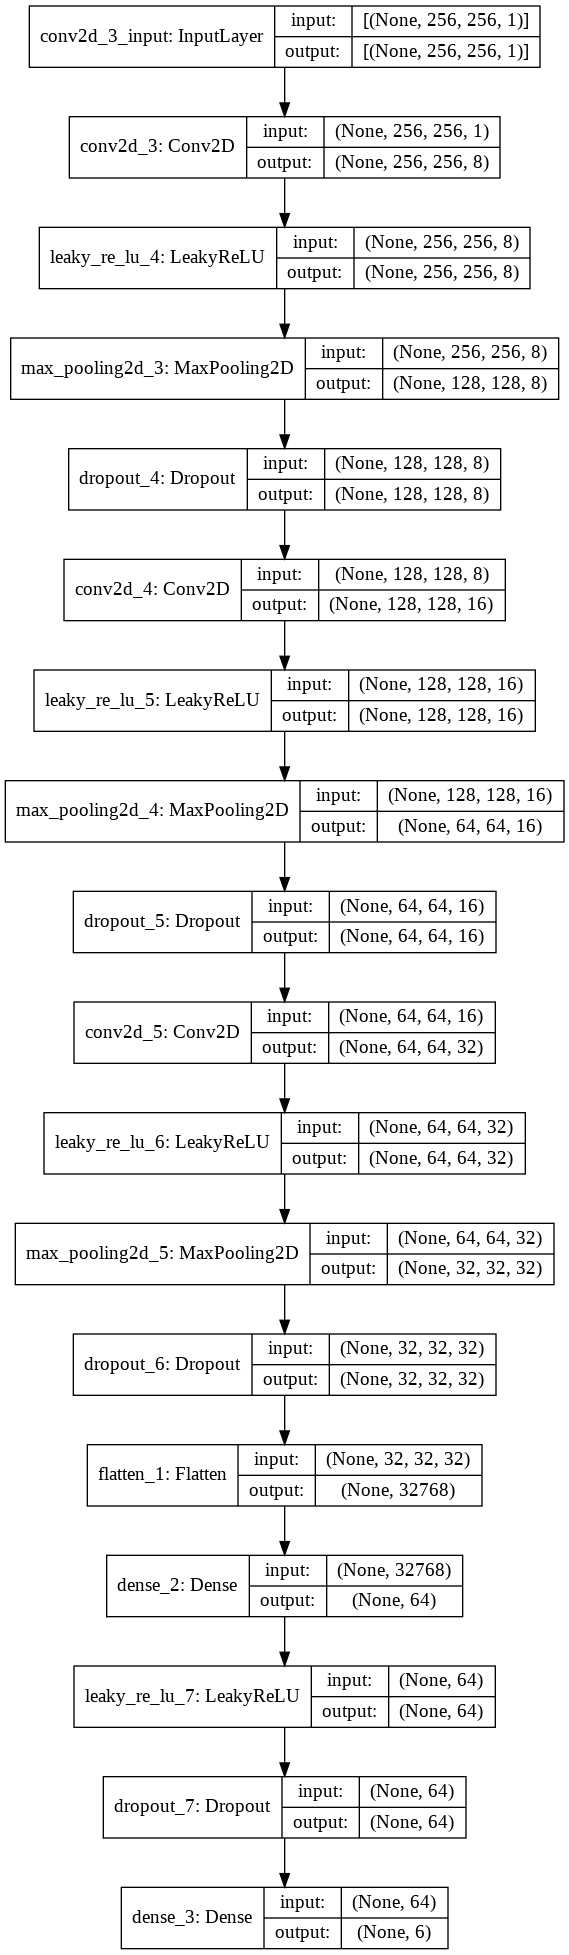

In [ ]:
plot_model(Cnn_network, show_layer_names = True, show_shapes = True)

In [ ]:
#del Cnn_network
#del Convnet_training_dropout

In [ ]:
Convnet_training_dropout = Cnn_network.fit(traindata_CNN, trainlabel_CNN, batch_size=32, epochs=110, verbose = 1, 
                                           validation_data=(valdata_CNN, vallabel_CNN))
Cnn_network.save('dry_fruit_modelA.h5') #after the model runs dry_fruit_model.h5 is saved in current working dir

Epoch 1/110
43/43 [==============================] - 10s 47ms/step - loss: 2.7834 - accuracy: 0.1883 - val_loss: 1.8050 - val_accuracy: 0.1491
Epoch 2/110
43/43 [==============================] - 1s 27ms/step - loss: 1.7856 - accuracy: 0.1852 - val_loss: 1.7914 - val_accuracy: 0.1754
Epoch 3/110
43/43 [==============================] - 1s 27ms/step - loss: 1.7700 - accuracy: 0.2223 - val_loss: 1.8686 - val_accuracy: 0.1754
Epoch 4/110
43/43 [==============================] - 1s 27ms/step - loss: 1.7309 - accuracy: 0.2499 - val_loss: 1.7427 - val_accuracy: 0.2135
Epoch 5/110
43/43 [==============================] - 1s 28ms/step - loss: 1.6499 - accuracy: 0.3171 - val_loss: 1.7272 - val_accuracy: 0.2310
Epoch 6/110
43/43 [==============================] - 1s 27ms/step - loss: 1.5217 - accuracy: 0.3645 - val_loss: 1.5156 - val_accuracy: 0.3421
Epoch 7/110
43/43 [==============================] - 1s 28ms/step - loss: 1.3745 - accuracy: 0.4618 - val_loss: 1.5846 - val_accuracy: 0.3596
Epoch

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
from keras.models import load_model
inference_model = load_model('/content/dry_fruit_model3.h5')

In [ ]:
results = inference_model.evaluate(testdata_CNN, testlabel_CNN)

14/14 [==============================] - 0s 12ms/step - loss: 2.8995 - accuracy: 0.8501


In [ ]:
history = Cnn_network.history.history

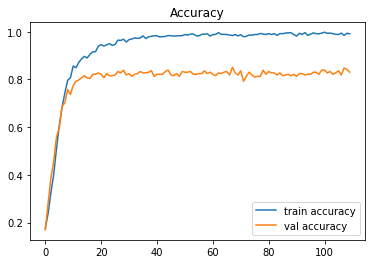

In [ ]:
train_acc = history['accuracy']
val_acc = history['val_accuracy']
plt.figure()
plt.plot(train_acc, label ='train accuracy')
plt.plot(val_acc, label ='val accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()

In [ ]:
train_loss = history['loss']
val_loss = history['val_loss']
plt.figure()
plt.plot(train_loss, label ='training loss')
plt.plot(val_loss, label ='validation loss')
plt.title('Loss')
plt.legend()
plt.show()	

In [ ]:
from sklearn.metrics import confusion_matrix
Y_prediction = Cnn_network.predict(valdata_CNN)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_prediction,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(vallabel_CNN,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
confusion_mtx

array([[65, 10,  1,  0,  3,  5],
       [ 0, 51,  1,  6,  3,  3],
       [ 1,  0, 40,  1,  4,  2],
       [ 3,  1,  0, 50,  1,  0],
       [ 1,  0,  4,  5, 38,  3],
       [ 6,  2,  0,  2,  2, 28]])

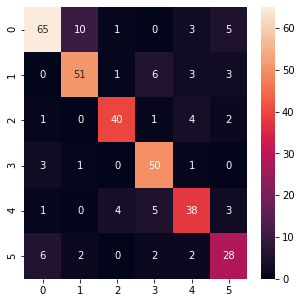

In [ ]:
import seaborn as sns
plt.figure(figsize=(5, 5))
sns.heatmap(confusion_mtx, annot=True, fmt="d");

# Test_Run

In [ ]:
test_img = cv2.imread('p1.jpg', 0)
test_img = cv2.resize(test_img, (256,256))
#print(test_img.shape)
test_img = np.expand_dims(test_img,axis=-1)
#print(test_img.shape)
test_img = np.expand_dims(test_img,axis=0)
#print(test_img.shape)

DryFruit is Pista and its nutrient value per 100gms is, '
' ಡ್ರೈಫ್ರೂಟ್ ಪಿಸ್ತಾ ಮತ್ತು 100 ಗ್ರಾಂಗೆ ಅದರ ಪೌಷ್ಟಿಕಾಂಶದ ಮೌಲ್ಯ, '
' உலர் பழம் பிஸ்டா மற்றும் 100 கிராம் ஒன்றுக்கு அதன் ஊட்டச்சத்து மதிப்பு, '
' : Calories: 557, Fat: 44.44g, Sodium: 1mg, Carbohydrates: 27.97g, Fiber: 10.3g, Sugars: 7.64g, Protein: 20.61g, "
" ಕ್ಯಾಲೋರಿಗಳು: 557, ಕೊಬ್ಬು: 44.44 ಗ್ರಾಂ, ಸೋಡಿಯಂ: 1 ಮಿಗ್ರಾಂ, ಕಾರ್ಬೋಹೈಡ್ರೇಟ್‌ಗಳು: 27.97 ಗ್ರಾಂ, ಫೈಬರ್: 10.3 ಗ್ರಾಂ, ಸಕ್ಕರೆ: 7.64 ಗ್ರಾಂ, ಪ್ರೋಟೀನ್: 20.61 ಗ್ರಾಂ, "
" கலோரிகள்: 557, கொழுப்பு: 44.44 கிராம், சோடியம்: 1 மி.கி, கார்போஹைட்ரேட்: 27.97 கிராம், ஃபைபர்: 10.3 கிராம், சர்க்கரைகள்: 7.64 கிராம், புரதம்: 20.61 கிராம்  


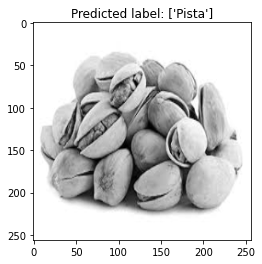

In [ ]:
test_pred = inference_model.predict(test_img)
test_pred = np.argmax(test_pred)
pred_label = [ ]
if test_pred == 0:
  pred_label.append('Pista')
  #info = 'Pista'
if test_pred == 1:
  pred_label.append('Walnut')
  
if test_pred == 2:
  pred_label.append('Cashew')
  
if test_pred == 3:
  pred_label.append('Dates')
 
if test_pred == 4:
  pred_label.append('Raisin')
  
if test_pred == 5:
  pred_label.append('Almond')
  
for z in pred_label:
  if (z == 'Pista'):
    inf_p =  ('Calories: 557, Fat: 44.44g, Sodium: 1mg, Carbohydrates: 27.97g, Fiber: 10.3g, Sugars: 7.64g, Protein: 20.61g, "\n" ಕ್ಯಾಲೋರಿಗಳು: 557, ಕೊಬ್ಬು: 44.44 ಗ್ರಾಂ, ಸೋಡಿಯಂ: 1 ಮಿಗ್ರಾಂ, ಕಾರ್ಬೋಹೈಡ್ರೇಟ್‌ಗಳು: 27.97 ಗ್ರಾಂ, ಫೈಬರ್: 10.3 ಗ್ರಾಂ, ಸಕ್ಕರೆ: 7.64 ಗ್ರಾಂ, ಪ್ರೋಟೀನ್: 20.61 ಗ್ರಾಂ, "\n" கலோரிகள்: 557, கொழுப்பு: 44.44 கிராம், சோடியம்: 1 மி.கி, கார்போஹைட்ரேட்: 27.97 கிராம், ஃபைபர்: 10.3 கிராம், சர்க்கரைகள்: 7.64 கிராம், புரதம்: 20.61 கிராம் ' )
    print("DryFruit is Pista and its nutrient value per 100gms is, '\n' ಡ್ರೈಫ್ರೂಟ್ ಪಿಸ್ತಾ ಮತ್ತು 100 ಗ್ರಾಂಗೆ ಅದರ ಪೌಷ್ಟಿಕಾಂಶದ ಮೌಲ್ಯ, '\n' உலர் பழம் பிஸ்டா மற்றும் 100 கிராம் ஒன்றுக்கு அதன் ஊட்டச்சத்து மதிப்பு, '\n' : {} ".format(inf_p))
  elif (z == 'Walnut'):
    inf_w = ('Calories: 654, Fat: 65.21g, Sodium: 2mg, Carbohydrates: 13.71g, Fiber: 6.7g, Sugars: 2.61g, Protein: 15.23g, "\n" ಕ್ಯಾಲೋರಿಗಳು: 654, ಕೊಬ್ಬು: 65.21 ಗ್ರಾಂ, ಸೋಡಿಯಂ: 2 ಮಿಗ್ರಾಂ, ಕಾರ್ಬೋಹೈಡ್ರೇಟ್‌ಗಳು: 13.71 ಗ್ರಾಂ, ಫೈಬರ್: 6.7 ಗ್ರಾಂ, ಸಕ್ಕರೆ: 2.61 ಗ್ರಾಂ, ಪ್ರೋಟೀನ್: 15.23 ಗ್ರಾಂ, "\n" கலோரிகள்: 654, கொழுப்பு: 65.21 கிராம், சோடியம்: 2 மி.கி, கார்போஹைட்ரேட்: 13.71 கிராம், ஃபைபர்: 6.7 கிராம், சர்க்கரைகள்: 2.61 கிராம், புரதம்: 15.23 கிராம் ') 
    print("DryFruit is Walnut and its nutrient value per 100gms is, '\n' ಡ್ರೈಫ್ರೂಟ್ ವಾಲ್ನಟ್ ಮತ್ತು 100 ಗ್ರಾಂಗೆ ಅದರ ಪೋಷಕಾಂಶಗಳ ಮೌಲ್ಯ '\n' உலர் பழம் வால்நட் மற்றும் 100 கிராமுக்கு அதன் ஊட்டச்சத்து மதிப்பு, \n' : {} ".format(inf_w))
  elif (z == 'Cashew'):
    inf_c = ('Calories: 581, Fat: 47.77g, Sodium: 308mg, Carbohydrates: 30.16g, Fiber: 3.3g, Sugars: 5.01g, Protein: 16.84g, "\n" ಕ್ಯಾಲೋರಿಗಳು: 581, ಕೊಬ್ಬು: 47.77 ಗ್ರಾಂ, ಸೋಡಿಯಂ: 308 ಮಿಗ್ರಾಂ, ಕಾರ್ಬೋಹೈಡ್ರೇಟ್ಗಳು: 30.16 ಗ್ರಾಂ, ಫೈಬರ್: 3.3 ಗ್ರಾಂ, ಸಕ್ಕರೆ: 5.01 ಗ್ರಾಂ, ಪ್ರೋಟೀನ್: 16.84 ಗ್ರಾಂ, "\n" கலோரிகள்: 581, கொழுப்பு: 47.77 கிராம், சோடியம்: 308 மி.கி, கார்போஹைட்ரேட்: 30.16 கிராம், ஃபைபர்: 3.3 கிராம், சர்க்கரைகள்: 5.01 கிராம், புரதம்: 16.84 கிராம் ') 
    print("DryFruit is Cashew and its nutrient value per 100gms is, '\n' ಡ್ರೈಫ್ರೂಟ್ ಗೋಡಂಬಿ ಮತ್ತು 100 ಗ್ರಾಂಗೆ ಅದರ ಪೌಷ್ಟಿಕಾಂಶದ ಮೌಲ್ಯ, '\n' , உலர் பழம் முந்திரி மற்றும் 100 கிராமுக்கு அதன் ஊட்டச்சத்து மதிப்பு, '\n'  : {} ".format(inf_c))
  elif (z == 'Dates'):
    inf_d = ('Calories: 282, Fat: 0.39g, Sodium:2.0mg, Carbohydrates: 75.03g, Fiber: 8g, Sugars: 65.35g, Protein: 2.45g, "\n" ಕ್ಯಾಲೋರಿಗಳು: 282, ಕೊಬ್ಬು: 0.39 ಗ್ರಾಂ, ಸೋಡಿಯಂ: 2.0 ಮಿಗ್ರಾಂ, ಕಾರ್ಬೋಹೈಡ್ರೇಟ್ಗಳು: 75.03 ಗ್ರಾಂ, ಫೈಬರ್: 8 ಗ್ರಾಂ, ಸಕ್ಕರೆ: 65.35 ಗ್ರಾಂ, ಪ್ರೋಟೀನ್: 2.45 ಗ್ರಾಂ, "\n" கலோரிகள்: 282, கொழுப்பு: 0.39 கிராம், சோடியம்: 2.0 மி.கி, கார்போஹைட்ரேட்: 75.03 கிராம், ஃபைபர்: 8 கிராம், சர்க்கரைகள்: 65.35 கிராம், புரதம்: 2.45 கிராம் ') 
    print("DryFruit is Dates and its nutrient value per 100gms is, '\n' ಡ್ರೈಫ್ರೂಟ್ ಕರ್ಜುರಾ ಮತ್ತು 100 ಗ್ರಾಂಗೆ ಅದರ ಪೌಷ್ಟಿಕಾಂಶದ ಮೌಲ್ಯ, '\n' உலர் பழம் தேதிகள் மற்றும் 100 கிராமுக்கு அதன் ஊட்டச்சத்து மதிப்பு, '\n' : {} ".format(inf_d))
  elif (z == 'Raisin'):
    inf_r = ('Calories: 299, Fat: 0.46g, Sodium: 11mg, Carbohydrates: 79.18g, Fiber: 3.7g, Sugars: 59.19g, Protein: 3.07g, "\n" ಕ್ಯಾಲೋರಿಗಳು: 299, ಕೊಬ್ಬು: 0.46 ಗ್ರಾಂ, ಸೋಡಿಯಂ: 11 ಮಿಗ್ರಾಂ, ಕಾರ್ಬೋಹೈಡ್ರೇಟ್: 79.18 ಗ್ರಾಂ, ಫೈಬರ್: 3.7 ಗ್ರಾಂ, ಸಕ್ಕರೆ: 59.19 ಗ್ರಾಂ, ಪ್ರೋಟೀನ್: 3.07 ಗ್ರಾಂ, "\n" கலோரிகள்: 299, கொழுப்பு: 0.46 கிராம், சோடியம்: 11 மி.கி, கார்போஹைட்ரேட்: 79.18 கிராம், ஃபைபர்: 3.7 கிராம், சர்க்கரைகள்: 59.19 கிராம், புரதம்: 3.07 கிராம் ') 
    print("DryFruit is Raisins and its nutrient value per 100gms is, '\n' ಡ್ರೈಫ್ರೂಟ್ ಒಣದ್ರಾಕ್ಷಿ ಮತ್ತು 100 ಗ್ರಾಂಗೆ ಅದರ ಪೋಷಕಾಂಶಗಳ ಮೌಲ್ಯ, '\n' உலர் பழம் திராட்சையும், அதன் ஊட்டச்சத்து மதிப்பு 100 கிராமுக்கு, '\n'  : {} ".format(inf_r))
  elif (z == 'Almonds'):
    inf_a = ('Calories: 578, Fat: 50.64g, Sodium: 1mg, Carbohydrates: 19.74g, Fiber: 11.8g, Sugars: 4.8g, Protein: 21.26g, "\n" ಕ್ಯಾಲೋರಿಗಳು: 578, ಕೊಬ್ಬು: 50.64 ಗ್ರಾಂ, ಸೋಡಿಯಂ: 1 ಮಿಗ್ರಾಂ, ಕಾರ್ಬೋಹೈಡ್ರೇಟ್: 19.74 ಗ್ರಾಂ, ಫೈಬರ್: 11.8 ಗ್ರಾಂ, ಸಕ್ಕರೆ: 4.8 ಗ್ರಾಂ, ಪ್ರೋಟೀನ್: 21.26 ಗ್ರಾಂ, "\n" கலோரிகள்: 578, கொழுப்பு: 50.64 கிராம், சோடியம்: 1 மி.கி, கார்போஹைட்ரேட்: 19.74 கிராம், ஃபைபர்: 11.8 கிராம், சர்க்கரைகள்: 4.8 கிராம், புரதம்: 21.26 கிராம் ') 
    print("DryFruit is Almonds and its nutrient value per 100gms is, '\n' ಡ್ರೈಫ್ರೂಟ್ ಬಾದಾಮಿ ಮತ್ತು 100 ಗ್ರಾಂಗೆ ಅದರ ಪೌಷ್ಟಿಕಾಂಶದ ಮೌಲ್ಯವಾಗಿದೆ, '\n' உலர் பழம் பாதாம் மற்றும் 100 கிராமுக்கு அதன் ஊட்டச்சத்து மதிப்பு, '\n'  : {} ".format(inf_a))
  else:
    print(' DryFruit not found ')          

image = np.squeeze(test_img)
plt.title(f'Predicted label: {pred_label}')
plt.imshow(image, cmap='gray')

plt.show()



It is Dates


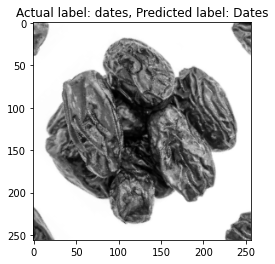

It is Dates


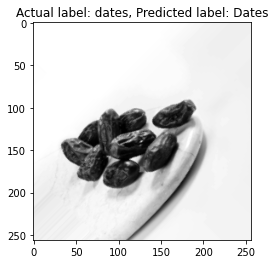

It is Pista
It is Pista


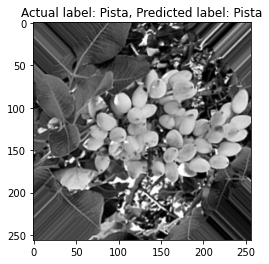

It is Pista
It is Pista


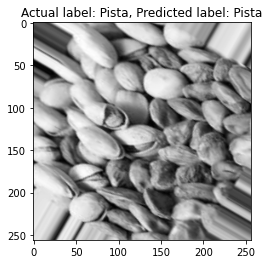

It is Almond


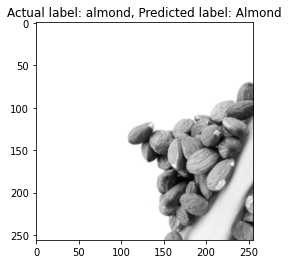

It is Cashew


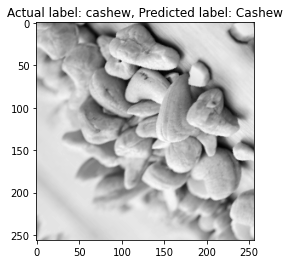

It is Cashew


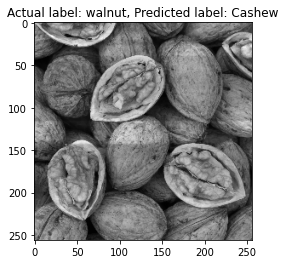

It is Cashew


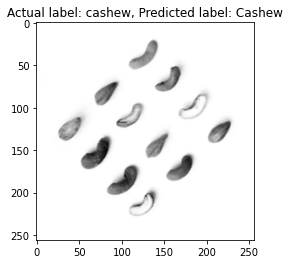

It is Raisin


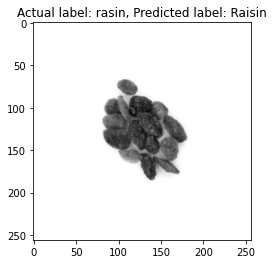

It is Raisin


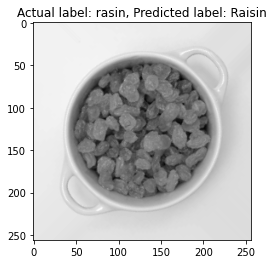

In [ ]:
plot_df = []
for i in range(len(testdata_CNN))[:10]:
  image = testdata_CNN[i,:,:,:]
  image = np.expand_dims(image,axis=0)
  # print(image.shape)

  # Getting True labels
  true_label = np.argmax(testlabel_CNN[i])
  if true_label == 0:
     true_label =  'Pista'
  if true_label == 1:
     true_label =  'walnut'
  if true_label == 2:
     true_label =  'cashew'
  if true_label == 3:
     true_label =  'dates'
  if true_label == 4:
     true_label =  'rasin'
  if true_label == 5:
     true_label =  'almond'

  # ----------------------------------------------------------------------- #
  
  pred =  inference_model.predict(image)
  classified_label = np.argmax(pred)
  if classified_label == 0:
    pred_label =  'Pista'
    info = 'It is Pista'
    print(info)
  if classified_label == 1:
    pred_label =  'Walnut'
    info = 'It is Walnut'
  if classified_label == 2:
    pred_label =  'Cashew'
    info = 'It is Cashew'
  if classified_label == 3:
    pred_label =  'Dates'
    info = 'It is Dates'
  if classified_label == 4:
    pred_label =  'Raisin'
    info = 'It is Raisin'
  if classified_label == 5:
    pred_label =  'Almond'
    info = 'It is Almond'
    
  # print(pred)
  plot_df.append(classified_label)
  image = np.squeeze(image)
  plt.title(f'Actual label: {true_label}, Predicted label: {pred_label}')
  plt.imshow(image, cmap='gray')
  print(info)
  plt.show()


In [ ]:
print(plot_df)
print(pred)

[3, 3, 0, 0, 5, 2, 2, 2, 4, 4]
[[1.9896977e-02 4.9463008e-02 3.6397256e-02 6.3870419e-07 6.9152015e-01
  2.0272197e-01]]
